In [1]:
#CODE FOR LOADING THE DATASET "dataset_aueb_argument_v3.json"
import json
import pandas as pd

label2id = {
    'NONE': 0,
    'EVIDENCE': 1,
    'CLAIM': 2}

def load_corpus(path, label_mapping=None):
    with open(path) as fp:
        corpus = json.load(fp)

    documents, texts, labels = [], [], []
    for abstract in corpus:
        documents.append(abstract)
        texts.append(corpus[abstract]['sentences'])
        if isinstance(label_mapping, dict):
            labels.append(
                [label_mapping[str(l).upper()]
                    for l in corpus[abstract]['labels']])
        else:
            labels.append([str(l).upper() for l in corpus[abstract]['labels']])

    assert len(texts) == len(labels)
    data = pd.DataFrame(
        zip(documents, texts, labels),
        columns=['document', 'sentences', 'labels'])

    return data

data = load_corpus('dataset_aueb_argument_v3.json') #, label_mapping=label2id)
print(f'Dataset length: {len(data)} abstracts')
data.sample(5)

Dataset length: 1017 abstracts


,document,sentences,labels
789,doi: 10.1186/s12915-016-0286-x,[A tissue-specific protein purification approa...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ..."
873,doi: 10.1590/0074-02760170145,[Culex quinquefasciatus from areas with the hi...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ..."
19,doi: 10.1002/ange.201700730,"[Synthesis of Dibenzo[hi,st\n]ovalene and Its ...","[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ..."
872,doi: 10.1557/mrs.2017.271,"[Self-organizing materials built with DNA, Abs...","[NEITHER, NEITHER]"
851,doi: 10.1371/journal.pone.0193890,[Optimized 3D co-registration of ultra-low-fie...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ..."


In [2]:
#CODE FOR LOADING THE DATASET "dataset.json"
import json
import pandas as pd

label2id = {
    'NONE': 0,
    'EVIDENCE': 1,
    'CLAIM': 2}

def load_corpus(path, label_mapping=None):
    with open(path) as fp:
        corpus = json.load(fp)

    documents, texts, labels = [], [], []
    for abstract in corpus:
        documents.append(abstract)
        texts.append(corpus[abstract]['sentences'])
        if isinstance(label_mapping, dict):
            labels.append(
                [label_mapping[str(l).upper()]
                    for l in corpus[abstract]['labels']])
        else:
            labels.append([str(l).upper() for l in corpus[abstract]['labels']])

    assert len(texts) == len(labels)
    data = pd.DataFrame(
        zip(documents, texts, labels),
        columns=['document', 'sentences', 'labels'])

    return data

data2 = load_corpus('dataset.json') #, label_mapping=label2id)
print(f'Dataset length: {len(data2)} abstracts')
data2.sample(5)

Dataset length: 1669 abstracts


,document,sentences,labels
1481,29104121,"[Safety, efficacy and pharmacodynamics of vesa...","[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON..."
1145,23439759,[Effects of melatonin on appetite and other sy...,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON..."
1251,21471765,[Randomized pilot evaluation of the supportive...,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON..."
126,DJK_G4B2_CorpusID_25571319.txt,[﻿Experiences from pregnancy and childbirth re...,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON..."
995,10.1177/1354068810391149,"[Ethnic inclusion and economic growth, Is eth...","[NONE, NONE, CLAIM, CLAIM, CLAIM, CLAIM, CLAIM..."


In [3]:
#concatenate the 2 datasets
data_final = pd.concat([data,data2], ignore_index=True)

In [4]:
#Explode to sentences
sentences = data_final['sentences'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'sentences': 'sentence'})
sentences

,doc_id,sentence
0,0,Concordance Between Different Amyloid Immunoas...
1,0,Importance Visual assessment of amyloid positr...
2,0,Several immunoassays have been developed to me...
3,0,The agreement between CSF Aβ42 measures from d...
4,0,Objective To determine the concordance between...
...,...,...
31999,2685,No statistically significant difference in con...
32000,2685,Latanoprost 0.005% once daily reduced IOP more...
32001,2685,Latanoprost had no statistically or clinically...
32002,2685,There was no difference in hyperemia between t...


In [5]:
#Explode to the corresponding labels
labels = data_final['labels'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'labels': 'label'})
labels

,doc_id,label
0,0,NEITHER
1,0,NEITHER
2,0,NEITHER
3,0,NEITHER
4,0,NEITHER
...,...,...
31999,2685,EVIDENCE
32000,2685,NONE
32001,2685,CLAIM
32002,2685,CLAIM


In [6]:
#we drop the doc_id column as it is not needed
labels = labels.drop(['doc_id'],axis =1)

In [7]:
#we concatenate the 2 data frames into one
df = pd.concat([sentences,labels], axis =1, sort = False)

In [8]:
df['label'] = df['label'].replace('NONE','NEITHER')
df

,doc_id,sentence,label
0,0,Concordance Between Different Amyloid Immunoas...,NEITHER
1,0,Importance Visual assessment of amyloid positr...,NEITHER
2,0,Several immunoassays have been developed to me...,NEITHER
3,0,The agreement between CSF Aβ42 measures from d...,NEITHER
4,0,Objective To determine the concordance between...,NEITHER
...,...,...,...
31999,2685,No statistically significant difference in con...,EVIDENCE
32000,2685,Latanoprost 0.005% once daily reduced IOP more...,NEITHER
32001,2685,Latanoprost had no statistically or clinically...,CLAIM
32002,2685,There was no difference in hyperemia between t...,CLAIM


In [9]:
#excluding neither arguments from dataset
df = df[df["label"] != "NEITHER"]

In [10]:
import nltk

In [11]:
# converting all sentences to lowercase and replacing the "." with " "
#removing ' ' at the beginning or the end of each sentence
df['sentence'] = df['sentence'].str.lower().str.replace('.', ' ', regex=False).str.strip()
df.head()

<ipython-input-11-750b8515a9cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'] = df['sentence'].str.lower().str.replace('.', ' ', regex=False).str.strip()


,doc_id,sentence,label
8,0,main outcomes and measures the concordance of ...,EVIDENCE
9,0,"results of 262 participants (mean [sd] age, 70...",EVIDENCE
10,0,the mass spectrometry–derived aβ42 values show...,EVIDENCE
11,0,the signal in the classic aβ42-innotest assay ...,EVIDENCE
12,0,"however, the classic aβ42-innotest assay showe...",EVIDENCE


In [12]:
# Concatenating all sentences into one text.
one_text = " ".join(df['sentence'])
print(one_text[:1000])

main outcomes and measures the concordance of csf aβ42 levels and aβ42:aβ40 and aβ42:tau ratios with visual [18f]flutemetamol pet status results of 262 participants (mean [sd] age, 70 9 [5 5] years), 108 were women (41 2%) and 154 were men (58 8%) the mass spectrometry–derived aβ42 values showed higher correlations with the modified aβ42-innotest (r = 0 97), aβ42-fl (r = 0 93), aβ42-ei (r = 0 93), and aβ42-msd (r = 0 95) assays compared with the classic aβ42-innotest assay (r = 0 88;p ≤  01) the signal in the classic aβ42-innotest assay was partly quenched by recombinant aβ1-40 peptide however, the classic aβ42-innotest assay showed better concordance with visual [18f]flutemetamol pet status (area under the receiver operating characteristic curve [auc], 0 92) compared with the newer assays (aucs, 0 87-0 89;p ≤  01) the accuracies of the newer assays improved significantly when aβ42:aβ40 (aucs, 0 93-0 95;p ≤  01), aβ42 to total tau (t-tau) (aucs, 0 94;p ≤  05), or aβ42 to phosphorylated

In [13]:
from collections import Counter

In [14]:
#we find the most common words
top_words = Counter(one_text.split()).most_common()
top_words[:20]

[('the', 11340),
 ('and', 8660),
 ('of', 8308),
 ('in', 7185),
 ('to', 4499),
 ('with', 3379),
 ('a', 3085),
 ('for', 2751),
 ('was', 2086),
 ('0', 2011),
 ('that', 1881),
 ('were', 1672),
 ('=', 1639),
 ('patients', 1400),
 ('is', 1370),
 ('at', 1201),
 ('by', 1141),
 ('as', 1108),
 ('on', 1038),
 ('group', 1015)]

In [15]:
#we also use the english stop words from the nltk library
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
#we combine stop words and most common used words into a list in order to later remove them from our data frame.
most_common = top_words[:100]
words_to_exclude = most_common+stop
words_to_exclude = list(dict.fromkeys(words_to_exclude))

In [17]:
#we remove them and form a new column which contains the "clean" text
df['sentence_clean'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words_to_exclude)]))

<ipython-input-17-31026e8da075>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence_clean'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words_to_exclude)]))


In [18]:
#we remove the older column which contained raw text
df = df.drop(['sentence'] ,axis =1)
df

,doc_id,label,sentence_clean
8,0,EVIDENCE,main outcomes measures concordance csf aβ42 le...
9,0,EVIDENCE,"results 262 participants (mean [sd] age, 70 9 ..."
10,0,EVIDENCE,mass spectrometry–derived aβ42 values showed h...
11,0,EVIDENCE,signal classic aβ42-innotest assay partly quen...
12,0,EVIDENCE,"however, classic aβ42-innotest assay showed be..."
...,...,...,...
31998,2685,EVIDENCE,statistically significant difference change aq...
31999,2685,EVIDENCE,statistically significant difference conjuncti...
32001,2685,CLAIM,latanoprost statistically clinically significa...
32002,2685,CLAIM,difference hyperemia two regimens


In [19]:
#renaming column
df = df.rename(columns={'sentence_clean' :'sentence' })
df

,doc_id,label,sentence
8,0,EVIDENCE,main outcomes measures concordance csf aβ42 le...
9,0,EVIDENCE,"results 262 participants (mean [sd] age, 70 9 ..."
10,0,EVIDENCE,mass spectrometry–derived aβ42 values showed h...
11,0,EVIDENCE,signal classic aβ42-innotest assay partly quen...
12,0,EVIDENCE,"however, classic aβ42-innotest assay showed be..."
...,...,...,...
31998,2685,EVIDENCE,statistically significant difference change aq...
31999,2685,EVIDENCE,statistically significant difference conjuncti...
32001,2685,CLAIM,latanoprost statistically clinically significa...
32002,2685,CLAIM,difference hyperemia two regimens


In [20]:
#drop the index column
df = df.reset_index()
df = df.drop(['index'] ,axis =1)
df

,doc_id,label,sentence
0,0,EVIDENCE,main outcomes measures concordance csf aβ42 le...
1,0,EVIDENCE,"results 262 participants (mean [sd] age, 70 9 ..."
2,0,EVIDENCE,mass spectrometry–derived aβ42 values showed h...
3,0,EVIDENCE,signal classic aβ42-innotest assay partly quen...
4,0,EVIDENCE,"however, classic aβ42-innotest assay showed be..."
...,...,...,...
9624,2685,EVIDENCE,statistically significant difference change aq...
9625,2685,EVIDENCE,statistically significant difference conjuncti...
9626,2685,CLAIM,latanoprost statistically clinically significa...
9627,2685,CLAIM,difference hyperemia two regimens


In [21]:
#import sentence transformer in order to extract sentence embeddings
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [22]:
#encode - create embeddings
w = model.encode(df['sentence'].to_list())
w

array([[ 0.2332907 , -0.14064145,  0.7949519 , ..., -0.02560868,
        -0.10161944,  0.2737522 ],
       [ 0.5113852 ,  0.08649528,  0.18232304, ..., -0.34363014,
         0.00534332,  0.22483397],
       [-0.04127128,  0.01684863,  0.16887346, ..., -0.37403533,
         0.27822667,  0.0320168 ],
       ...,
       [-0.3318196 ,  0.32356644,  0.07595173, ...,  0.35534832,
         0.3683529 , -0.18656878],
       [-0.8332986 ,  0.6184559 ,  0.21076702, ..., -0.62022346,
         0.4052251 , -0.54333985],
       [ 0.2526212 ,  0.07373051,  0.2956862 , ...,  0.28322217,
         0.04813977,  0.41632372]], dtype=float32)

In [23]:
#normalize w in order to put it as input to produce pairwise distances
normal_w = (w - w.min(axis=0)) / (w.max(axis=0) - w.min(axis=0))
normal_w

array([[0.534756  , 0.3613878 , 0.8523434 , ..., 0.4962173 , 0.4821688 ,
        0.577143  ],
       [0.64357275, 0.46275204, 0.5406804 , ..., 0.35955328, 0.51876396,
        0.5551988 ],
       [0.4273215 , 0.43167084, 0.5338382 , ..., 0.34648716, 0.6121254 ,
        0.46870297],
       ...,
       [0.31363165, 0.56854975, 0.48656607, ..., 0.6599268 , 0.6429603 ,
        0.37064776],
       [0.11740584, 0.70015   , 0.5551507 , ..., 0.24069224, 0.65557534,
        0.21060398],
       [0.5423199 , 0.4570555 , 0.59835166, ..., 0.6289319 , 0.5334059 ,
        0.64109915]], dtype=float32)

In [24]:
from sklearn.metrics.pairwise import pairwise_distances

In [25]:
#creating the distance matrix from embeddings
distance_matrix = pairwise_distances(normal_w, Y=None, metric='euclidean')

In [26]:
import numpy as np

In [27]:
#normalizing distance_matrix
n_distance_matrix = (distance_matrix - distance_matrix.min(axis=0)) / (distance_matrix.max(axis=0) - distance_matrix.min(axis=0))
n_distance_matrix

array([[0.        , 0.6532828 , 0.5496749 , ..., 0.71283084, 0.7444585 ,
        0.68833035],
       [0.6454298 , 0.        , 0.60968107, ..., 0.6684026 , 0.688023  ,
        0.69820106],
       [0.50462085, 0.5665186 , 0.        , ..., 0.60543466, 0.662249  ,
        0.6364338 ],
       ...,
       [0.73000765, 0.6928373 , 0.6753811 , ..., 0.        , 0.68115306,
        0.637389  ],
       [0.86429477, 0.80849355, 0.8374974 , ..., 0.7721918 , 0.        ,
        0.84669685],
       [0.7027653 , 0.72151625, 0.7077948 , ..., 0.6354437 , 0.7445947 ,
        0.        ]], dtype=float32)

In [28]:
#creating the similarities
n_similarity_matrix = 1 - n_distance_matrix
n_similarity_matrix

array([[1.        , 0.34671718, 0.45032507, ..., 0.28716916, 0.2555415 ,
        0.31166965],
       [0.3545702 , 1.        , 0.39031893, ..., 0.3315974 , 0.31197703,
        0.30179894],
       [0.49537915, 0.4334814 , 1.        , ..., 0.39456534, 0.33775097,
        0.36356622],
       ...,
       [0.26999235, 0.3071627 , 0.32461888, ..., 1.        , 0.31884694,
        0.362611  ],
       [0.13570523, 0.19150645, 0.16250259, ..., 0.22780818, 1.        ,
        0.15330315],
       [0.2972347 , 0.27848375, 0.2922052 , ..., 0.3645563 , 0.2554053 ,
        1.        ]], dtype=float32)

In [29]:
#keep only the main diagonal elements
n_similarity_matrix = np.triu(n_similarity_matrix)
n_similarity_matrix

array([[1.        , 0.34671718, 0.45032507, ..., 0.28716916, 0.2555415 ,
        0.31166965],
       [0.        , 1.        , 0.39031893, ..., 0.3315974 , 0.31197703,
        0.30179894],
       [0.        , 0.        , 1.        , ..., 0.39456534, 0.33775097,
        0.36356622],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.31884694,
        0.362611  ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.15330315],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [30]:
#create a copy in order to plot a histogram
histog = n_similarity_matrix.copy()

In [31]:
#removing all values for lower triangular matrix
histog[np.tril_indices(histog.shape[0], -1)] = np.nan
histog

array([[1.        , 0.34671718, 0.45032507, ..., 0.28716916, 0.2555415 ,
        0.31166965],
       [       nan, 1.        , 0.39031893, ..., 0.3315974 , 0.31197703,
        0.30179894],
       [       nan,        nan, 1.        , ..., 0.39456534, 0.33775097,
        0.36356622],
       ...,
       [       nan,        nan,        nan, ..., 1.        , 0.31884694,
        0.362611  ],
       [       nan,        nan,        nan, ...,        nan, 1.        ,
        0.15330315],
       [       nan,        nan,        nan, ...,        nan,        nan,
        1.        ]], dtype=float32)

In [32]:
import matplotlib.pyplot as plt

In [33]:
plt.rcParams["figure.figsize"] = (20,10)

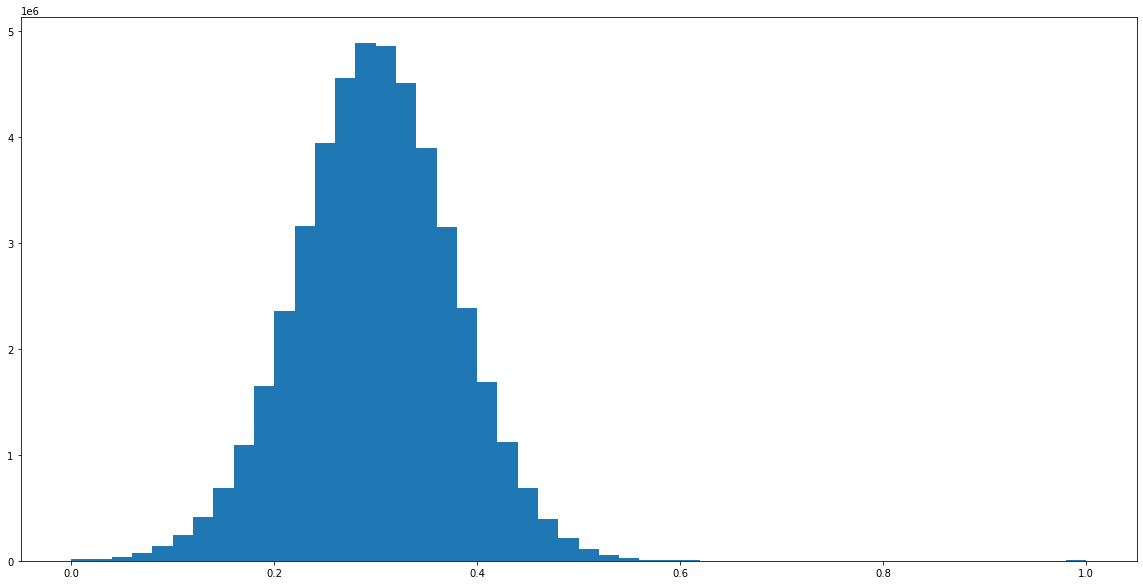

In [34]:
#plot the histogram in order to observe the distribution and pick a threshold
plt.hist(histog.flatten(),50)
plt.show()

In [35]:
#preview
test_df = pd.DataFrame(n_similarity_matrix)
test_df

,0,1,2,3,4,5,6,7,8,9,...,9619,9620,9621,9622,9623,9624,9625,9626,9627,9628
0,1.0,0.346717,0.450325,0.451950,0.537867,0.580148,0.578623,0.572391,0.609555,0.496004,...,0.365840,0.298992,0.282655,0.290235,0.384930,0.395261,0.297665,0.287169,0.255542,0.311670
1,0.0,1.000000,0.390319,0.326982,0.374015,0.356759,0.318548,0.381940,0.317662,0.313632,...,0.421509,0.306731,0.273266,0.378029,0.382713,0.373191,0.399974,0.331597,0.311977,0.301799
2,0.0,0.000000,1.000000,0.632178,0.608858,0.620013,0.474810,0.671351,0.518143,0.362082,...,0.402587,0.360609,0.333150,0.413201,0.467641,0.462372,0.468361,0.394565,0.337751,0.363566
3,0.0,0.000000,0.000000,1.000000,0.528661,0.531365,0.443694,0.578780,0.512104,0.350984,...,0.346357,0.324900,0.329438,0.356284,0.414831,0.423213,0.374154,0.374760,0.290166,0.339446
4,0.0,0.000000,0.000000,0.000000,1.000000,0.561736,0.446364,0.661775,0.474327,0.397234,...,0.463001,0.383946,0.393420,0.434083,0.497427,0.493140,0.454778,0.420494,0.305935,0.422671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9624,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.496979,0.423915,0.331763,0.418943
9625,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500504,0.540072,0.406840
9626,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.318847,0.362611
9627,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.153303


In [36]:
#creating list with uper triangular vaues of similarity matrix
stats_list = test_df.stack().tolist()

In [37]:
#creating list to check some statistic measures like mean and std and removing 0 values as we previously set all lower 
#triangular values to 0
stats_list = [i for i in stats_list if i != 0]
stats_list

[1.0,
 0.3467171788215637,
 0.450325071811676,
 0.4519496560096741,
 0.5378673672676086,
 0.5801476240158081,
 0.5786232948303223,
 0.5723907947540283,
 0.6095551252365112,
 0.49600428342819214,
 0.35149675607681274,
 0.3662131428718567,
 0.4213526248931885,
 0.5062214136123657,
 0.4338793158531189,
 0.3638719320297241,
 0.268302857875824,
 0.2330249547958374,
 0.22257590293884277,
 0.2307063341140747,
 0.3216260075569153,
 0.2615801692008972,
 0.27438902854919434,
 0.31360721588134766,
 0.3016855716705322,
 0.3347971439361572,
 0.29987889528274536,
 0.2921963930130005,
 0.27024298906326294,
 0.2635273337364197,
 0.2759283781051636,
 0.25070005655288696,
 0.3006811738014221,
 0.23620599508285522,
 0.2594876289367676,
 0.2684342861175537,
 0.31047940254211426,
 0.22377687692642212,
 0.23402494192123413,
 0.2552887797355652,
 0.39560675621032715,
 0.35337960720062256,
 0.3705286383628845,
 0.2675091624259949,
 0.4064409136772156,
 0.33643507957458496,
 0.2935832738876343,
 0.235660612583

In [38]:
import statistics

In [39]:
#calculating the mean
statistics.mean(stats_list)

0.29976446618289376

In [40]:
#calculating the strandard deviation
statistics.stdev(stats_list)

0.07699485321715097

In [41]:
#observing bins and number of instances so to decide for the threshold
np.histogram(n_similarity_matrix)

(array([46631023,  4089238, 18886476, 18795122,  4099169,   200739,
            5825,      327,       36,     9686], dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32))

In [42]:
#After trying to set the threshold to mean + 2σ the clustering that occured was very poor. Therefore we decided to proceed with
#a strating threshold of 0.6 similarity in order to connect only abstract that have a stronger connection.
#define threshold and creating a numpy array with the indexes of desired instances
threshold = 0.6
indexes = np.where(n_similarity_matrix > threshold)
indexes

(array([   0,    0,    1, ..., 9626, 9627, 9628], dtype=int64),
 array([   0,    8,    1, ..., 9626, 9627, 9628], dtype=int64))

In [43]:
#transforming numpy array to list
listOfCoordinates= list(zip(indexes[0], indexes[1]))

In [44]:
len(listOfCoordinates)

15874

In [45]:
#excluding coordinates of same index
listOfCoordinates_2 = []
for i in range (0,15874):
    if listOfCoordinates[i][0] != listOfCoordinates[i][1]:
        listOfCoordinates_2.append(listOfCoordinates[i])

In [46]:
listOfCoordinates_2

[(0, 8),
 (1, 11),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 7),
 (4, 7),
 (4, 1790),
 (4, 1792),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 549),
 (5, 553),
 (5, 703),
 (5, 707),
 (5, 710),
 (5, 712),
 (5, 2373),
 (6, 551),
 (6, 553),
 (6, 703),
 (6, 2373),
 (26, 882),
 (26, 2033),
 (27, 875),
 (35, 974),
 (40, 41),
 (40, 6153),
 (40, 6482),
 (40, 7086),
 (40, 7142),
 (40, 7223),
 (40, 7489),
 (40, 7650),
 (40, 7657),
 (40, 7797),
 (40, 7986),
 (40, 8680),
 (40, 8691),
 (40, 8865),
 (49, 51),
 (60, 74),
 (61, 75),
 (65, 73),
 (69, 70),
 (72, 73),
 (76, 88),
 (85, 86),
 (89, 90),
 (106, 1669),
 (107, 109),
 (107, 112),
 (110, 7512),
 (114, 117),
 (115, 120),
 (116, 8445),
 (124, 128),
 (124, 1933),
 (124, 2448),
 (125, 1932),
 (128, 2547),
 (131, 370),
 (131, 413),
 (140, 8468),
 (153, 155),
 (173, 2280),
 (175, 8308),
 (181, 182),
 (185, 188),
 (190, 191),
 (190, 194),
 (190, 195),
 (191, 194),
 (191, 195),
 (191, 8176),
 (191, 8308),
 (191, 8497),
 (194, 195),
 (195, 8176),
 (195, 8497),
 (197, 2471),
 (

In [47]:
len(listOfCoordinates_2)

6245

In [48]:
#from tuple to list
listOfCoordinates_3 = []
for z in range(0,6245):
    listOfCoordinates_3.append(list(listOfCoordinates_2[z]))

In [49]:
listOfCoordinates_3

[[0, 8],
 [1, 11],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 7],
 [4, 7],
 [4, 1790],
 [4, 1792],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 549],
 [5, 553],
 [5, 703],
 [5, 707],
 [5, 710],
 [5, 712],
 [5, 2373],
 [6, 551],
 [6, 553],
 [6, 703],
 [6, 2373],
 [26, 882],
 [26, 2033],
 [27, 875],
 [35, 974],
 [40, 41],
 [40, 6153],
 [40, 6482],
 [40, 7086],
 [40, 7142],
 [40, 7223],
 [40, 7489],
 [40, 7650],
 [40, 7657],
 [40, 7797],
 [40, 7986],
 [40, 8680],
 [40, 8691],
 [40, 8865],
 [49, 51],
 [60, 74],
 [61, 75],
 [65, 73],
 [69, 70],
 [72, 73],
 [76, 88],
 [85, 86],
 [89, 90],
 [106, 1669],
 [107, 109],
 [107, 112],
 [110, 7512],
 [114, 117],
 [115, 120],
 [116, 8445],
 [124, 128],
 [124, 1933],
 [124, 2448],
 [125, 1932],
 [128, 2547],
 [131, 370],
 [131, 413],
 [140, 8468],
 [153, 155],
 [173, 2280],
 [175, 8308],
 [181, 182],
 [185, 188],
 [190, 191],
 [190, 194],
 [190, 195],
 [191, 194],
 [191, 195],
 [191, 8176],
 [191, 8308],
 [191, 8497],
 [194, 195],
 [195, 8176],
 [195, 8497],
 [197, 2471],
 [

In [50]:
len(listOfCoordinates_3)

6245

In [51]:
listOfCoordinates_4 = listOfCoordinates_3.copy()

In [52]:
len(listOfCoordinates_4)

6245

In [53]:
#for each pair of index add the similarity between them
for z in range(0,6245):
    i=listOfCoordinates_4[z][0]
    j=listOfCoordinates_4[z][1]
    listOfCoordinates_4[z].append(n_similarity_matrix[i][j])

In [54]:
listOfCoordinates_4

[[0, 8, 0.6095551],
 [1, 11, 0.60346174],
 [2, 3, 0.6321777],
 [2, 4, 0.6088582],
 [2, 5, 0.62001264],
 [2, 7, 0.67135096],
 [4, 7, 0.6617753],
 [4, 1790, 0.68475276],
 [4, 1792, 0.60179293],
 [5, 6, 0.6637582],
 [5, 7, 0.63099146],
 [5, 8, 0.6329696],
 [5, 549, 0.64346766],
 [5, 553, 0.6128286],
 [5, 703, 0.60943866],
 [5, 707, 0.6002134],
 [5, 710, 0.6364252],
 [5, 712, 0.62015104],
 [5, 2373, 0.63917106],
 [6, 551, 0.6288246],
 [6, 553, 0.6103937],
 [6, 703, 0.61184573],
 [6, 2373, 0.6146961],
 [26, 882, 0.6189829],
 [26, 2033, 0.60957676],
 [27, 875, 0.605225],
 [35, 974, 0.6486256],
 [40, 41, 0.63951147],
 [40, 6153, 0.6050025],
 [40, 6482, 0.64362985],
 [40, 7086, 0.62910116],
 [40, 7142, 0.63702595],
 [40, 7223, 0.61063373],
 [40, 7489, 0.6134991],
 [40, 7650, 0.611956],
 [40, 7657, 0.60639125],
 [40, 7797, 0.60273635],
 [40, 7986, 0.6040435],
 [40, 8680, 0.62418044],
 [40, 8691, 0.619524],
 [40, 8865, 0.61693764],
 [49, 51, 0.65861046],
 [60, 74, 1.0],
 [61, 75, 1.0],
 [65, 73,

In [55]:
#for each pair of similarity append the corresponding doc_ids
for z in range(0,6245):
    i=listOfCoordinates_4[z][0]
    j=listOfCoordinates_4[z][1]
    listOfCoordinates_4[z].append(df.iloc[i][0])
    listOfCoordinates_4[z].append(df.iloc[j][0])

In [56]:
listOfCoordinates_4

[[0, 8, 0.6095551, 0, 0],
 [1, 11, 0.60346174, 0, 1],
 [2, 3, 0.6321777, 0, 0],
 [2, 4, 0.6088582, 0, 0],
 [2, 5, 0.62001264, 0, 0],
 [2, 7, 0.67135096, 0, 0],
 [4, 7, 0.6617753, 0, 0],
 [4, 1790, 0.68475276, 0, 687],
 [4, 1792, 0.60179293, 0, 687],
 [5, 6, 0.6637582, 0, 0],
 [5, 7, 0.63099146, 0, 0],
 [5, 8, 0.6329696, 0, 0],
 [5, 549, 0.64346766, 0, 210],
 [5, 553, 0.6128286, 0, 210],
 [5, 703, 0.60943866, 0, 281],
 [5, 707, 0.6002134, 0, 281],
 [5, 710, 0.6364252, 0, 281],
 [5, 712, 0.62015104, 0, 281],
 [5, 2373, 0.63917106, 0, 868],
 [6, 551, 0.6288246, 0, 210],
 [6, 553, 0.6103937, 0, 210],
 [6, 703, 0.61184573, 0, 281],
 [6, 2373, 0.6146961, 0, 868],
 [26, 882, 0.6189829, 4, 364],
 [26, 2033, 0.60957676, 4, 765],
 [27, 875, 0.605225, 4, 361],
 [35, 974, 0.6486256, 5, 397],
 [40, 41, 0.63951147, 7, 7],
 [40, 6153, 0.6050025, 7, 2068],
 [40, 6482, 0.64362985, 7, 2128],
 [40, 7086, 0.62910116, 7, 2229],
 [40, 7142, 0.63702595, 7, 2238],
 [40, 7223, 0.61063373, 7, 2254],
 [40, 7489,

In [57]:
#deleting the indexes and keeping the similarity value between the doc ids
for z in range(0,6245):
    listOfCoordinates_4[z].pop(0)
    listOfCoordinates_4[z].pop(0)

In [58]:
listOfCoordinates_4

[[0.6095551, 0, 0],
 [0.60346174, 0, 1],
 [0.6321777, 0, 0],
 [0.6088582, 0, 0],
 [0.62001264, 0, 0],
 [0.67135096, 0, 0],
 [0.6617753, 0, 0],
 [0.68475276, 0, 687],
 [0.60179293, 0, 687],
 [0.6637582, 0, 0],
 [0.63099146, 0, 0],
 [0.6329696, 0, 0],
 [0.64346766, 0, 210],
 [0.6128286, 0, 210],
 [0.60943866, 0, 281],
 [0.6002134, 0, 281],
 [0.6364252, 0, 281],
 [0.62015104, 0, 281],
 [0.63917106, 0, 868],
 [0.6288246, 0, 210],
 [0.6103937, 0, 210],
 [0.61184573, 0, 281],
 [0.6146961, 0, 868],
 [0.6189829, 4, 364],
 [0.60957676, 4, 765],
 [0.605225, 4, 361],
 [0.6486256, 5, 397],
 [0.63951147, 7, 7],
 [0.6050025, 7, 2068],
 [0.64362985, 7, 2128],
 [0.62910116, 7, 2229],
 [0.63702595, 7, 2238],
 [0.61063373, 7, 2254],
 [0.6134991, 7, 2297],
 [0.611956, 7, 2328],
 [0.60639125, 7, 2330],
 [0.60273635, 7, 2357],
 [0.6040435, 7, 2390],
 [0.62418044, 7, 2518],
 [0.619524, 7, 2521],
 [0.61693764, 7, 2552],
 [0.65861046, 12, 12],
 [1.0, 20, 28],
 [1.0, 20, 28],
 [0.62804276, 22, 27],
 [0.6624395

In [59]:
#dropping similarities between same doc id
final_listOfCoordinates = []
for z in range(0,6245):
    if (listOfCoordinates_4[z][1] != listOfCoordinates_4[z][2]) & (listOfCoordinates_4[z] not in final_listOfCoordinates):
        final_listOfCoordinates.append(listOfCoordinates_4[z])

In [60]:
final_listOfCoordinates

[[0.60346174, 0, 1],
 [0.68475276, 0, 687],
 [0.60179293, 0, 687],
 [0.64346766, 0, 210],
 [0.6128286, 0, 210],
 [0.60943866, 0, 281],
 [0.6002134, 0, 281],
 [0.6364252, 0, 281],
 [0.62015104, 0, 281],
 [0.63917106, 0, 868],
 [0.6288246, 0, 210],
 [0.6103937, 0, 210],
 [0.61184573, 0, 281],
 [0.6146961, 0, 868],
 [0.6189829, 4, 364],
 [0.60957676, 4, 765],
 [0.605225, 4, 361],
 [0.6486256, 5, 397],
 [0.6050025, 7, 2068],
 [0.64362985, 7, 2128],
 [0.62910116, 7, 2229],
 [0.63702595, 7, 2238],
 [0.61063373, 7, 2254],
 [0.6134991, 7, 2297],
 [0.611956, 7, 2328],
 [0.60639125, 7, 2330],
 [0.60273635, 7, 2357],
 [0.6040435, 7, 2390],
 [0.62418044, 7, 2518],
 [0.619524, 7, 2521],
 [0.61693764, 7, 2552],
 [1.0, 20, 28],
 [0.62804276, 22, 27],
 [0.60754806, 29, 35],
 [0.6559725, 50, 650],
 [0.61738825, 53, 2302],
 [0.6101968, 54, 2475],
 [0.60063124, 56, 739],
 [0.64525586, 56, 893],
 [0.6013861, 56, 739],
 [0.6001376, 56, 935],
 [0.61260796, 58, 137],
 [0.6776145, 58, 161],
 [0.6079799, 64, 2

In [61]:
len(final_listOfCoordinates)

4649

In [62]:
#from list to data frame
final_listOfCoordinates_df = pd.DataFrame(final_listOfCoordinates)
final_listOfCoordinates_df

,0,1,2
0,0.603462,0,1
1,0.684753,0,687
2,0.601793,0,687
3,0.643468,0,210
4,0.612829,0,210
...,...,...,...
4644,0.625310,2677,2679
4645,0.684590,2677,2679
4646,0.611621,2678,2683
4647,0.607023,2680,2683


In [63]:
#creating dataframe with stracture : 'similarity', 'from', 'to'
final_listOfCoordinates_df = final_listOfCoordinates_df.rename(columns = {0: 'similarity', 1: 'from', 2: 'to'})
final_listOfCoordinates_df

,similarity,from,to
0,0.603462,0,1
1,0.684753,0,687
2,0.601793,0,687
3,0.643468,0,210
4,0.612829,0,210
...,...,...,...
4644,0.625310,2677,2679
4645,0.684590,2677,2679
4646,0.611621,2678,2683
4647,0.607023,2680,2683


In [64]:
#keep highest values between similarity of same pairs of abstracts
keep_highest = final_listOfCoordinates_df.sort_values('similarity').drop_duplicates(["from","to"],keep='last')
keep_highest

,similarity,from,to
2686,0.600001,2230,2330
939,0.600004,1515,1517
3110,0.600023,2334,2555
2535,0.600025,2212,2310
616,0.600026,1161,1173
...,...,...,...
808,1.000000,1408,1551
780,1.000000,1351,1414
778,1.000000,1333,1399
1069,1.000000,1886,1891


In [65]:
len(keep_highest)

3393

In [66]:
#creating the final list from the dataframe
finale = keep_highest.values.tolist()

In [68]:
finale

[[0.6000012159347534, 2230.0, 2330.0],
 [0.6000043153762817, 1515.0, 1517.0],
 [0.6000232696533203, 2334.0, 2555.0],
 [0.6000245213508606, 2212.0, 2310.0],
 [0.6000257730484009, 1161.0, 1173.0],
 [0.6000450849533081, 2261.0, 2557.0],
 [0.6000516414642334, 2052.0, 2132.0],
 [0.600051999092102, 1459.0, 1471.0],
 [0.6000601649284363, 2524.0, 2683.0],
 [0.6000624299049377, 2324.0, 2554.0],
 [0.6000703573226929, 361.0, 760.0],
 [0.600073516368866, 2171.0, 2180.0],
 [0.600080132484436, 2092.0, 2356.0],
 [0.6000967025756836, 2349.0, 2360.0],
 [0.6001019477844238, 2616.0, 2626.0],
 [0.6001131534576416, 2090.0, 2302.0],
 [0.6001136302947998, 2039.0, 2063.0],
 [0.6001228094100952, 2060.0, 2371.0],
 [0.6001268029212952, 2295.0, 2301.0],
 [0.6001331806182861, 2544.0, 2570.0],
 [0.6001355648040771, 462.0, 975.0],
 [0.6001375913619995, 56.0, 935.0],
 [0.6001947522163391, 2655.0, 2680.0],
 [0.6001983284950256, 2110.0, 2335.0],
 [0.6002006530761719, 2039.0, 2537.0],
 [0.6002016067504883, 2109.0, 2409.

In [69]:
#create a graph
import networkx as nx
G = nx.Graph()

In [70]:
#add all doc ids as nodes
for i in range(0,2686):
    G.add_node(i)

In [71]:
#creating edges with their weights
for i in range(0,3393):
    G.add_edge(finale[i][1],finale[i][2], weight=finale[i][0])

In [72]:
import matplotlib.pyplot as plt

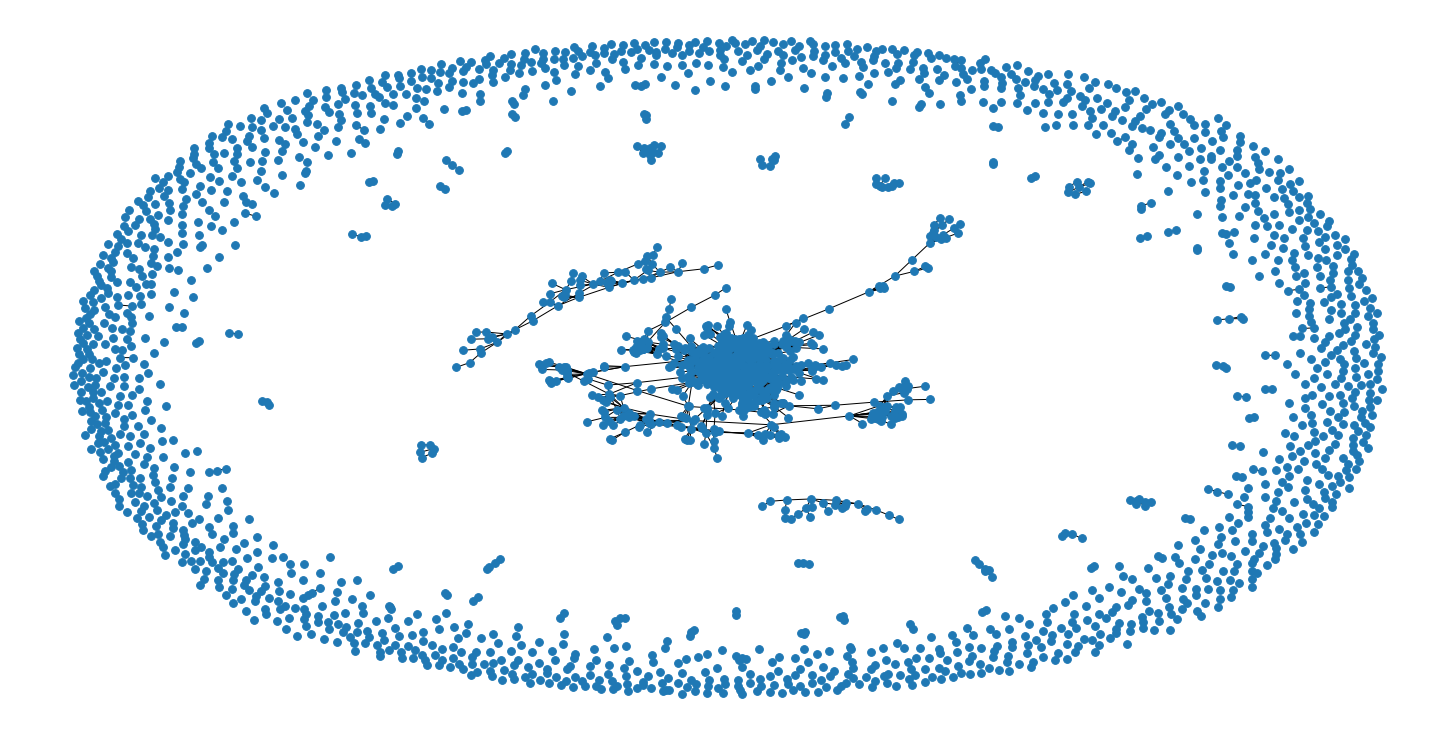

In [73]:
#plot the Graph
nx.draw(G,node_size=60)
plt.show()

In [74]:
from networkx import find_cliques
from networkx.algorithms.community import *

In [75]:
#printing all communuties with k >=4
list(k_clique_communities(G, 4))

[frozenset({0, 210, 281.0, 868.0, 884.0}),
 frozenset({7,
            2108,
            2128.0,
            2173.0,
            2231.0,
            2238.0,
            2256.0,
            2269.0,
            2328.0,
            2369.0,
            2414.0,
            2552.0,
            2564.0}),
 frozenset({7,
            225,
            557.0,
            826,
            1300,
            1426,
            2022,
            2028,
            2031.0,
            2034.0,
            2037.0,
            2038,
            2039.0,
            2041.0,
            2051.0,
            2052,
            2053,
            2055.0,
            2057,
            2060.0,
            2062.0,
            2063.0,
            2066.0,
            2072,
            2074,
            2075.0,
            2078.0,
            2081,
            2089,
            2090,
            2091,
            2092.0,
            2096,
            2097,
            2104,
            2106,
            2107.0,
          

In [76]:
#printing all communuties with k >=3
list(k_clique_communities(G, 3))

[frozenset({0, 210, 281.0, 594.0, 868.0, 884.0}),
 frozenset({7,
            225,
            283,
            557.0,
            558.0,
            631,
            819,
            826.0,
            829,
            846,
            929.0,
            1101,
            1280,
            1300,
            1395,
            1426,
            1442,
            2017,
            2020,
            2022,
            2025,
            2028,
            2029,
            2031.0,
            2034.0,
            2037.0,
            2038,
            2039.0,
            2041.0,
            2045,
            2047,
            2048,
            2051.0,
            2052,
            2053,
            2054,
            2055.0,
            2057,
            2060,
            2062.0,
            2063.0,
            2065,
            2066.0,
            2069,
            2072,
            2073,
            2074,
            2075.0,
            2078.0,
            2080,
            2081,
            2

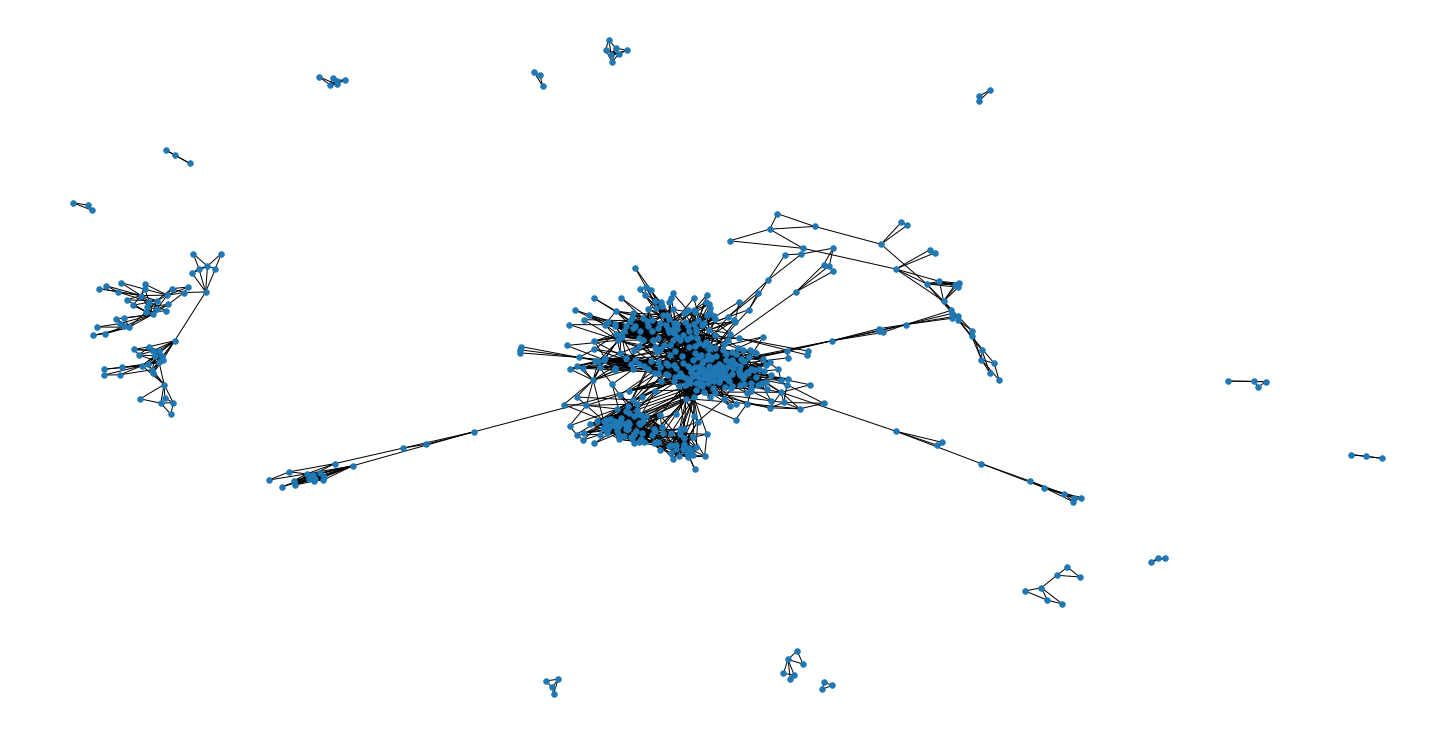

In [77]:
#plot communities with k>=3
cliques = nx.find_cliques(G)
cliques3 = [clq for clq in cliques if len(clq) >= 3]
nodes = set(n for clq in cliques3 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

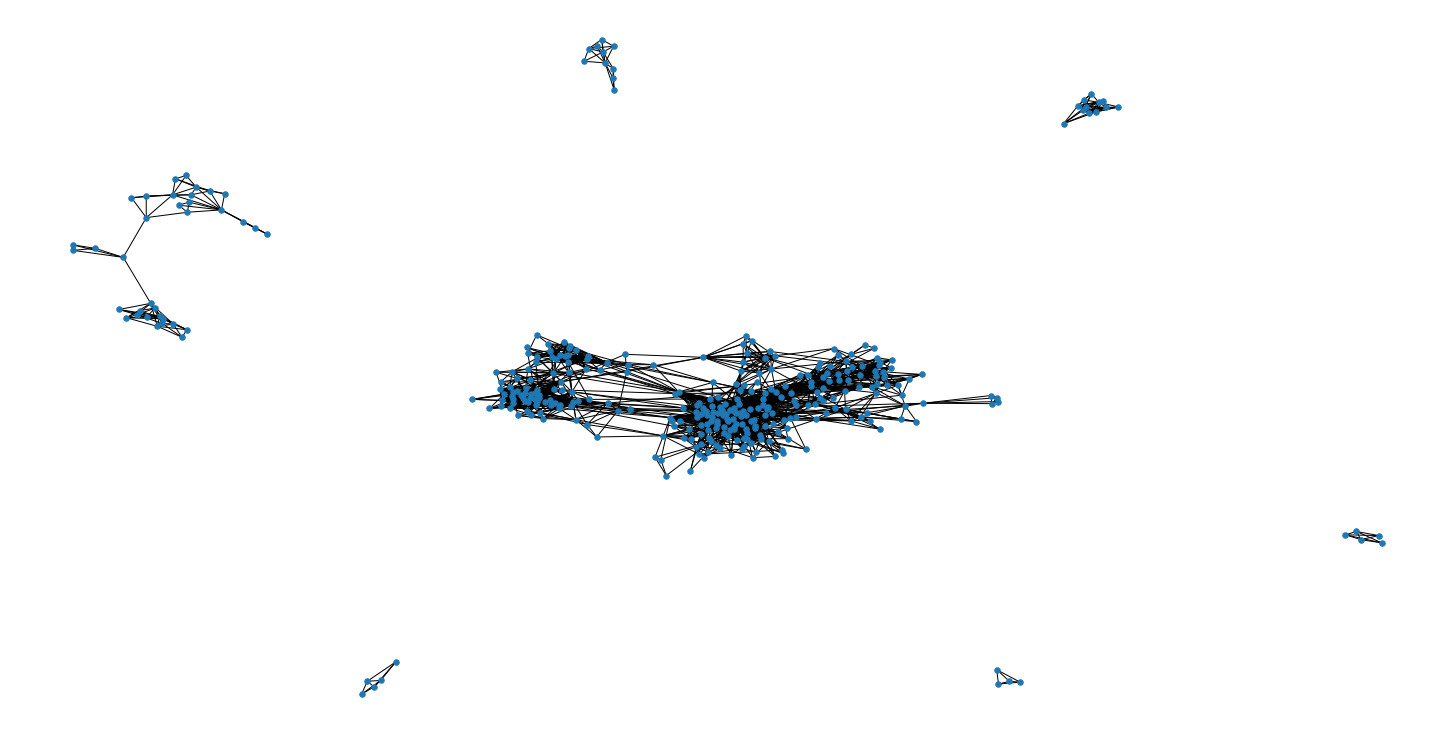

In [78]:
#plot communities with k>=4
cliques = nx.find_cliques(G)
cliques4 = [clq for clq in cliques if len(clq) >= 4]
nodes = set(n for clq in cliques4 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

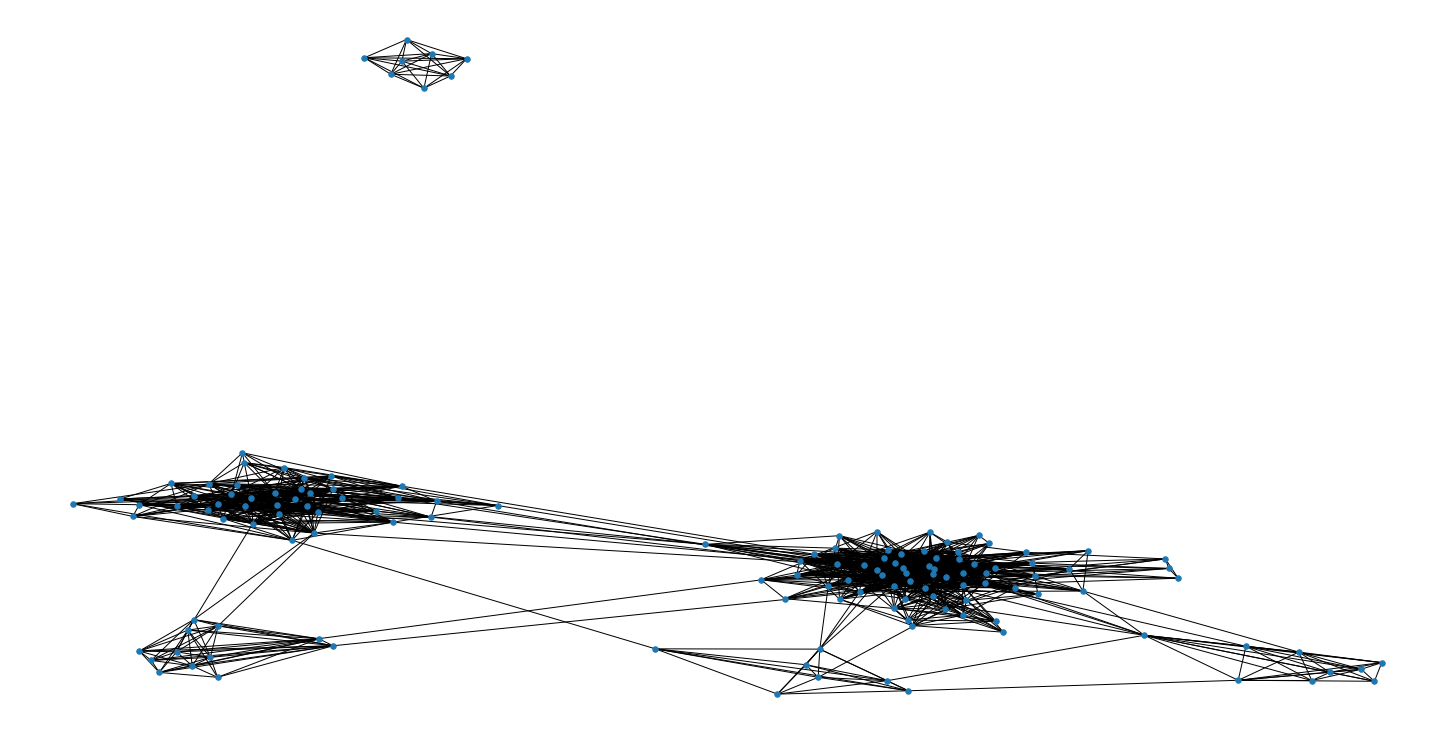

In [79]:
#plot communities with k>=7
cliques = nx.find_cliques(G)
cliques7 = [clq for clq in cliques if len(clq) >= 7]
nodes = set(n for clq in cliques7 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

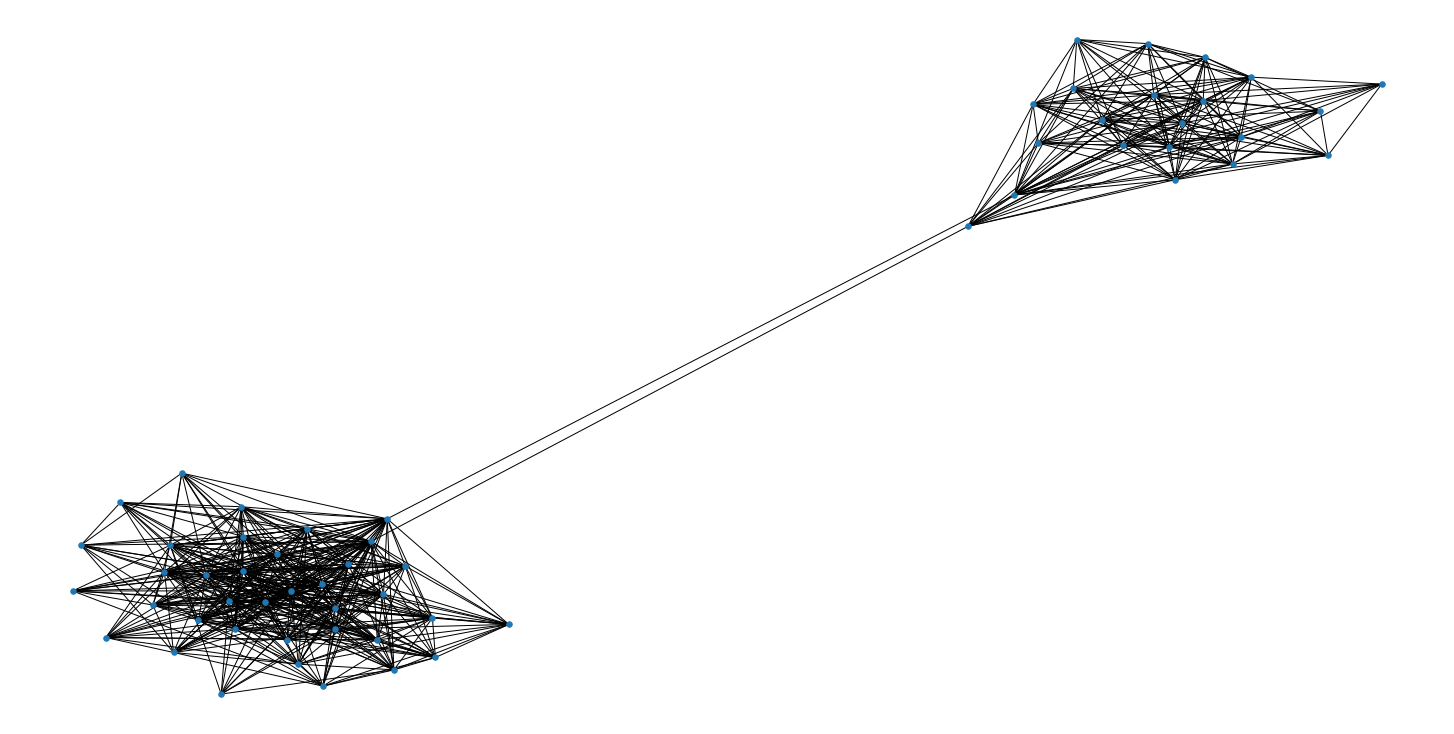

In [80]:
#plot communities with k>=10
cliques = nx.find_cliques(G)
cliques10 = [clq for clq in cliques if len(clq) >= 10]
nodes = set(n for clq in cliques10 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

In [81]:
#set the edge weights in order to drop some edges
edge_weights = nx.get_edge_attributes(G,'weight')
edge_weights

{(0, 1.0): 0.603461742401123,
 (0, 281.0): 0.6364251971244812,
 (0, 868.0): 0.6391710638999939,
 (0, 210.0): 0.6434676647186279,
 (0, 687.0): 0.6847527623176575,
 (4, 361.0): 0.6052250266075134,
 (4, 765.0): 0.6095767617225647,
 (4, 364.0): 0.6189829111099243,
 (5, 397.0): 0.6486256122589111,
 (7, 2357.0): 0.6027363538742065,
 (7, 2390.0): 0.6040434837341309,
 (7, 2068.0): 0.6050025224685669,
 (7, 2330.0): 0.6063912510871887,
 (7, 2254.0): 0.6106337308883667,
 (7, 2328.0): 0.611956000328064,
 (7, 2297.0): 0.613499104976654,
 (7, 2552.0): 0.6169376373291016,
 (7, 2521.0): 0.6195240020751953,
 (7, 2518.0): 0.6241804361343384,
 (7, 2229.0): 0.6291011571884155,
 (7, 2238.0): 0.6370259523391724,
 (7, 2128.0): 0.6436298489570618,
 (20, 28.0): 1.0,
 (22, 27.0): 0.6280427575111389,
 (29, 35.0): 0.6075480580329895,
 (50, 650.0): 0.6559724807739258,
 (53, 2302.0): 0.6173882484436035,
 (54, 2475.0): 0.6101968288421631,
 (56, 935.0): 0.6001375913619995,
 (56, 739.0): 0.6013860702514648,
 (56, 893.

In [82]:
#remove all edges with weight < 0.65 (similarity <0.65)
G.remove_edges_from((e for e, z in edge_weights.items() if z < 0.65))

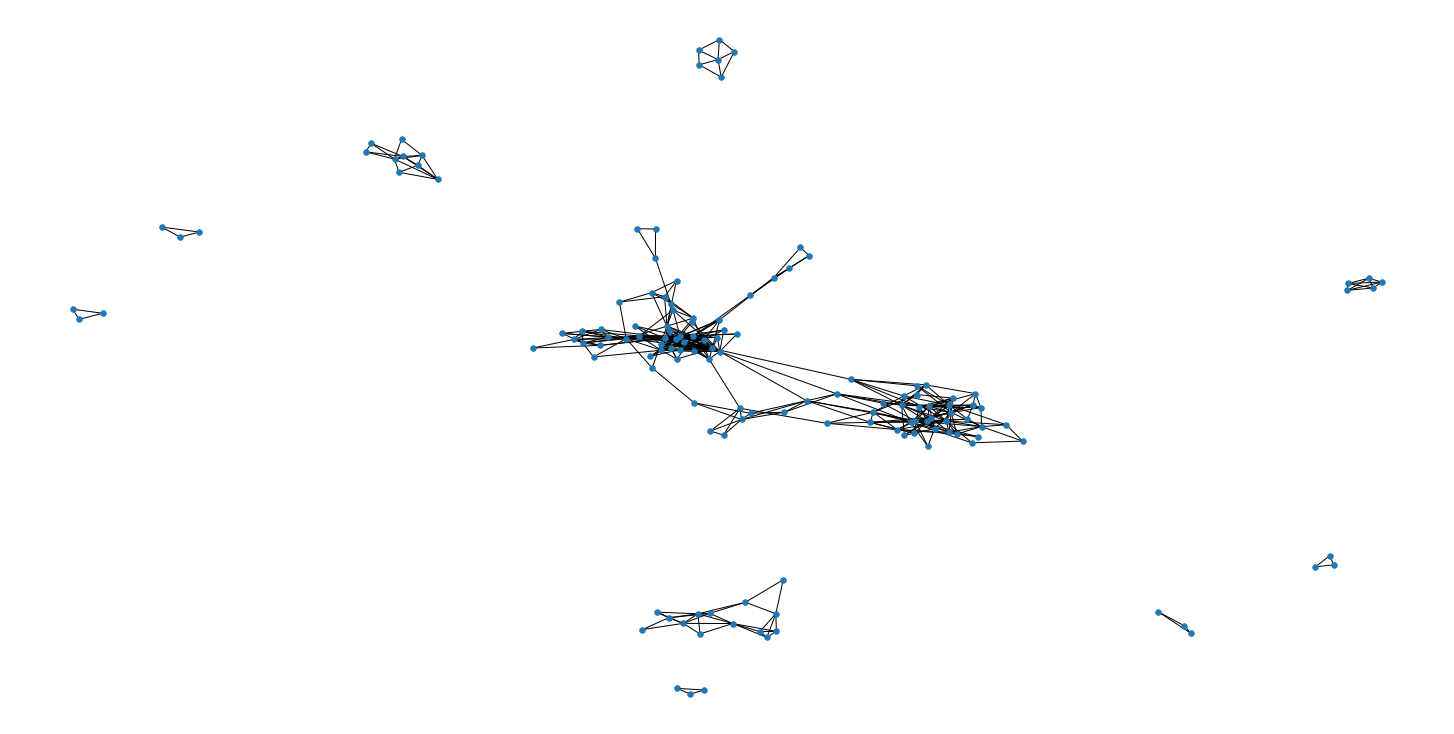

In [83]:
#plot communities with k>=3
cliques = nx.find_cliques(G)
cliques3 = [clq for clq in cliques if len(clq) >= 3]
nodes = set(n for clq in cliques3 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

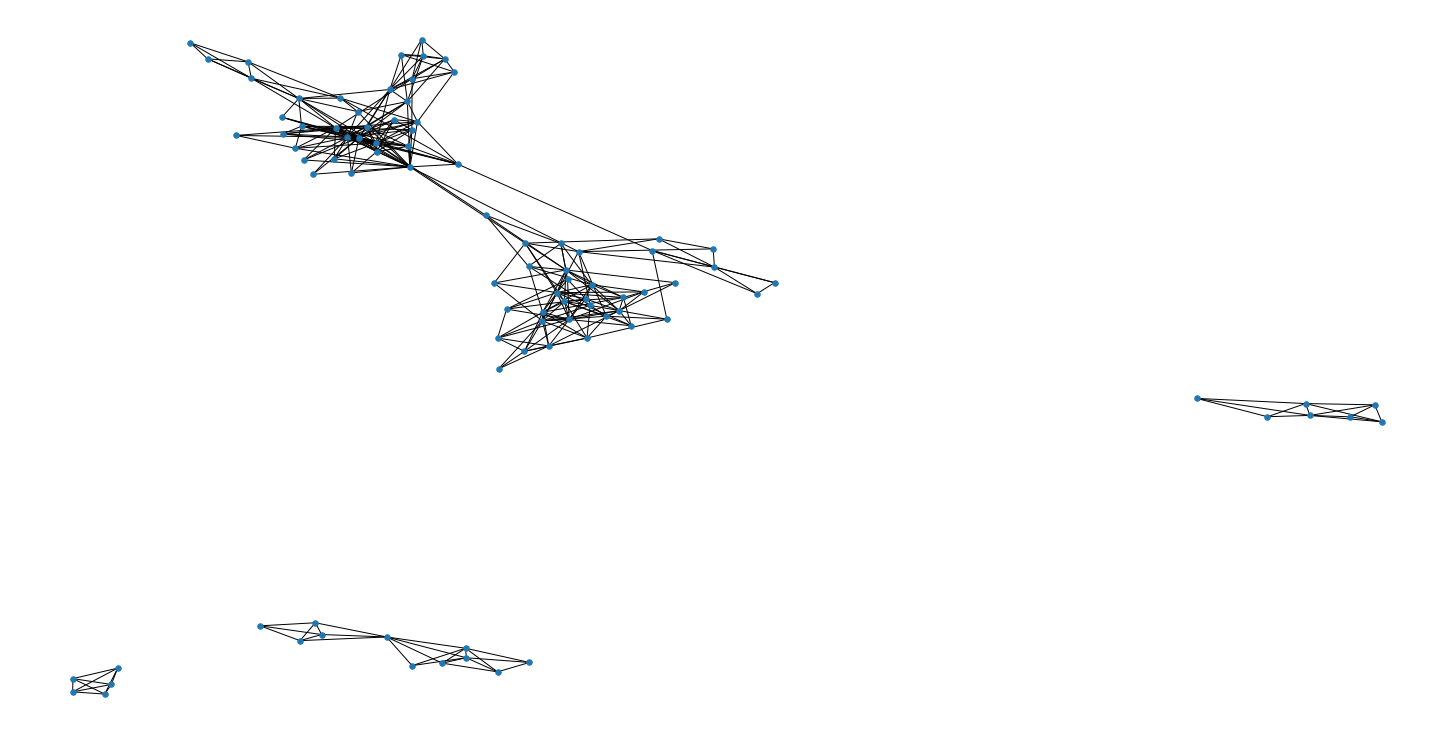

In [84]:
#plot communities with k>=4
cliques = nx.find_cliques(G)
cliques4 = [clq for clq in cliques if len(clq) >= 4]
nodes = set(n for clq in cliques4 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

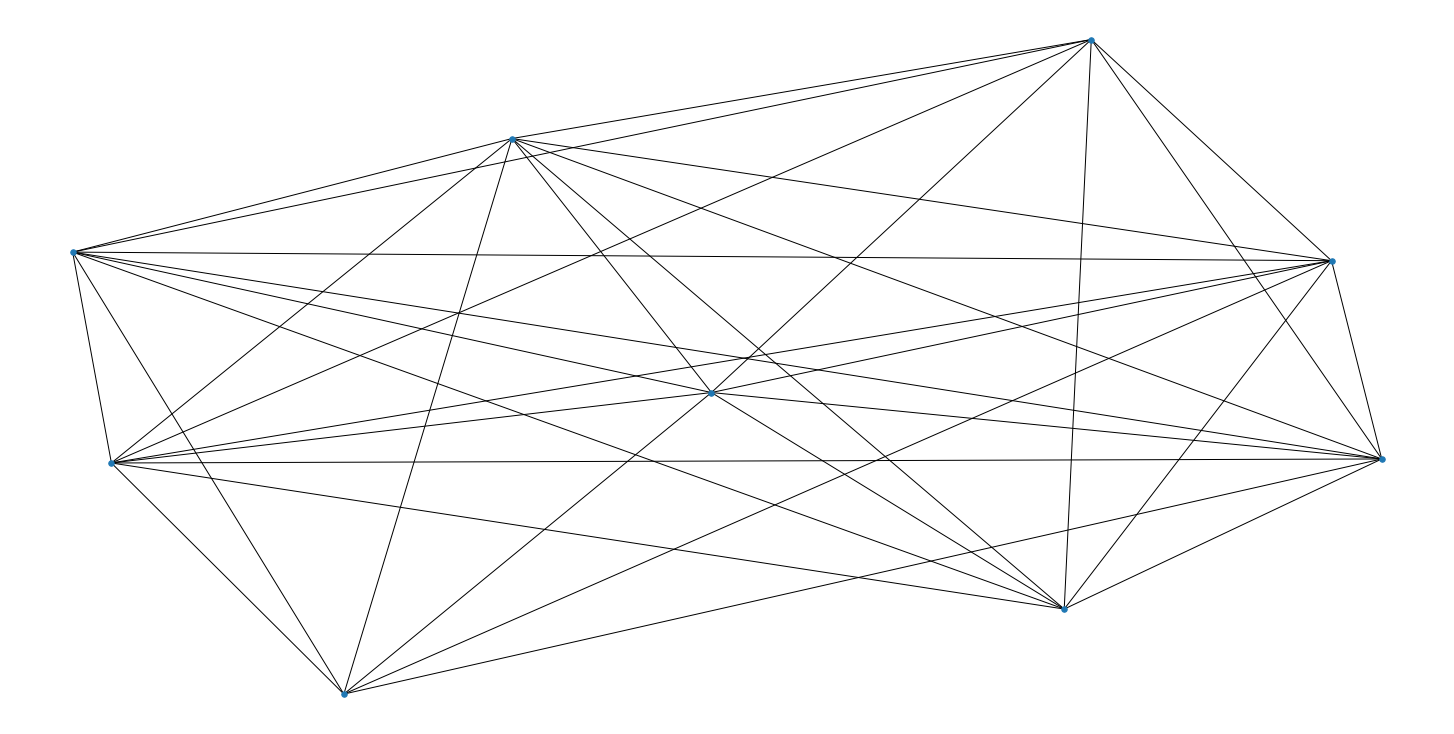

In [85]:
#plot communities with k>=7
cliques = nx.find_cliques(G)
cliques7 = [clq for clq in cliques if len(clq) >= 7]
nodes = set(n for clq in cliques7 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

In [86]:
#remove all edges with weight < 0.7 (similarity <0.7)
G.remove_edges_from((e for e, z in edge_weights.items() if z < 0.7))

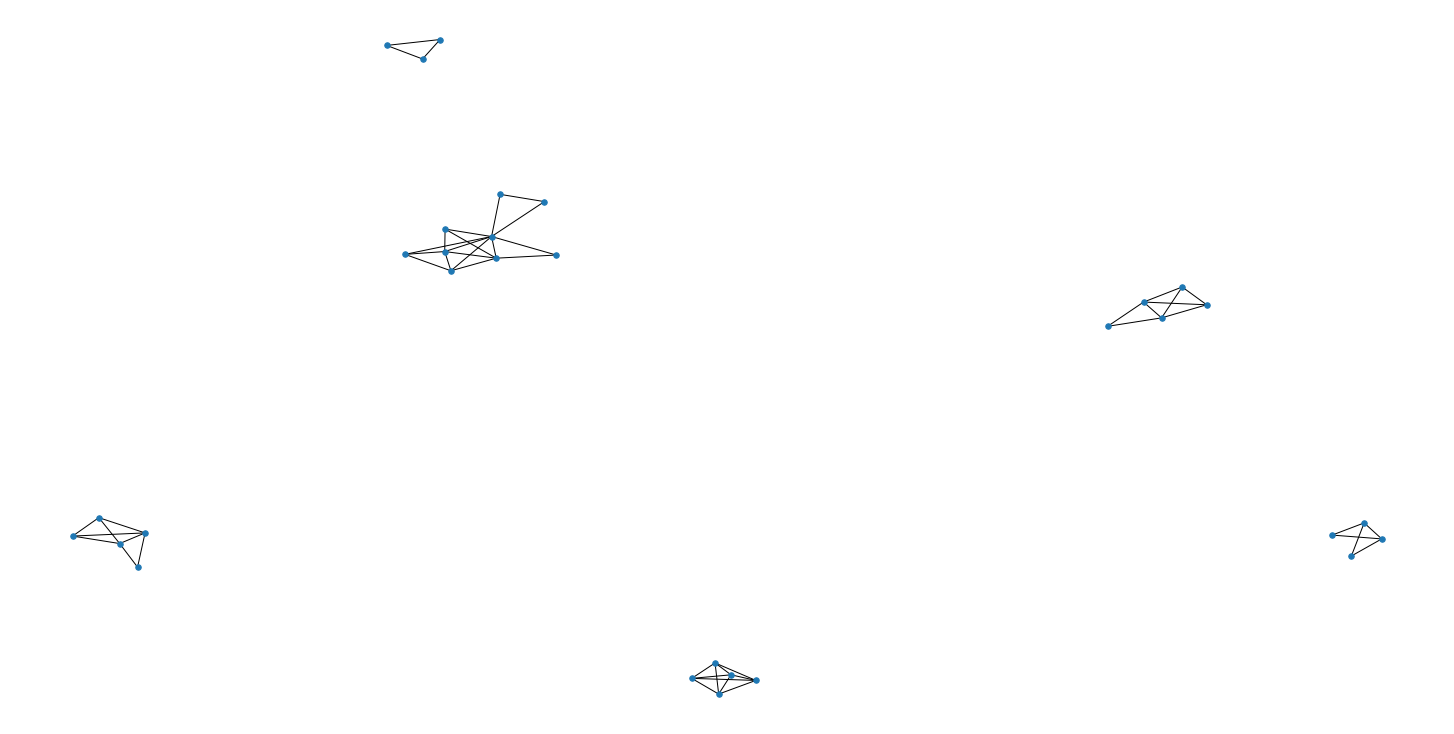

In [87]:
#plot communities with k>=3
cliques = nx.find_cliques(G)
cliques3 = [clq for clq in cliques if len(clq) >= 3]
nodes = set(n for clq in cliques3 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

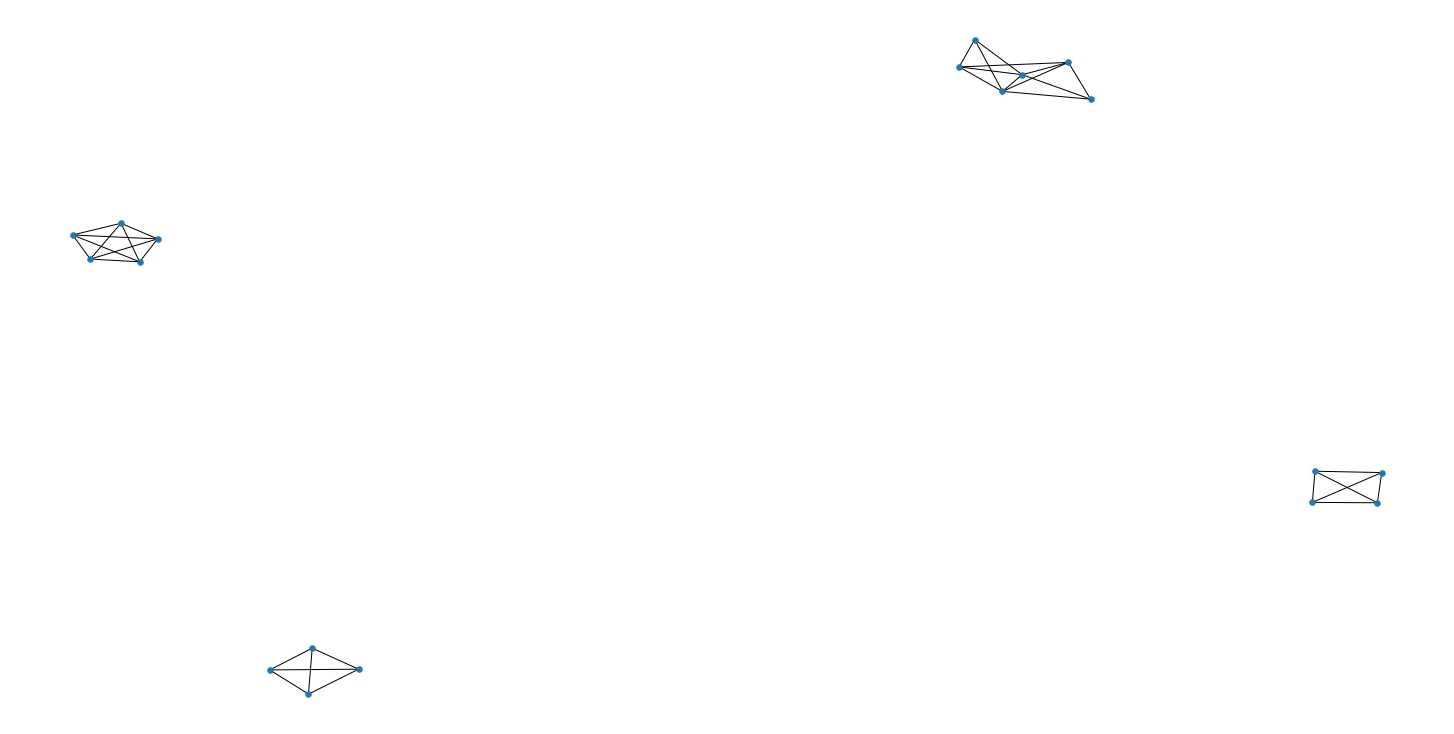

In [113]:
#plot communities with k>=4
cliques = nx.find_cliques(G)
cliques4 = [clq for clq in cliques if len(clq) >= 4]
nodes = set(n for clq in cliques4 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

In [110]:
#print communities of k>= 4  in order to conduct some qualitative analysis
cliques4

[[796, 2002.0, 818.0, 819.0, 814.0],
 [2132, 2344.0, 2381.0, 2031.0],
 [2132, 2344.0, 2039.0, 2041.0],
 [2132, 2344.0, 2039.0, 2031.0],
 [2149, 2324.0, 2199.0, 2375.0],
 [2620, 2656.0, 2630.0, 2647.0]]

In [107]:
#correctly clustered. Both articles speak for treatments to elderly people
print('---------------These are the claims & evidence for abstact with id 2132-------------')
print(data_final['sentences'][2132][-8:])
print('---------------These are the claims & evidence for abstact with id 2031-------------')
print(data_final['sentences'][2031][-9:])

---------------These are the claims & evidence for abstact with id 2132-------------
['Among these 32 patients, 8 had a partial response (intent-to-treat response rate, 20%), and 10 (25%) had stable disease.', 'The median survival was 7.8 months (range, 4-11.6 months).', 'The 1- and 2-year survival rates were 25% and 7%, respectively; median time to progression was 4.3 months (range, 0.2-13.8 months).', 'Grade 3/4 neutropenia was seen in 27 patients (68%), and grade 3/4 anemia was seen in 5 patients (13%).', 'One patient died of febrile neutropenia during treatment.', 'The main nonhematologic adverse effect was fatigue (grade 3/4 in 18% of patients).', 'Carboplatin/vinorelbine is well tolerated by elderly patients with extensive-stage NSCLC.', 'Efficacy is low but similar to that of other treatments used in this setting.']
---------------These are the claims & evidence for abstact with id 2031-------------
['There was no statistical difference in median overall survival with docetaxel 

In [104]:
#wrongly clustered. Poor annotation process has led to a wrong clustering here as last sentence was not removing and was
#wrongly annotated by a team as argument.
print('---------------These are the claims & evidence for abstact with id 796-------------')
print(data_final['sentences'][796][-8:])
print('---------------These are the claims & evidence for abstact with id 2002-------------')
print(data_final['sentences'][2002][-8:])

---------------These are the claims & evidence for abstact with id 796-------------
['Methods We conducted a joint analysis of 5,523,934 imputed SNPs in two newly-genotyped progressive supranuclear palsy cohorts, primarily derived from two clinical trials (Allon davunetide and NNIPPS riluzole trials in PSP) and a previously published genome-wide association study (GWAS), in total comprising 1646 cases and 10,662 controls of European ancestry.', 'Results We identified 5 associated loci at a genome-wide significance threshold P\u2009<\u20095\u2009×\u200910−\u20098, including replication of 3 loci from previous studies and 2 novel loci at 6p21.1 and 12p12.1 (near RUNX2 and SLCO1A2, respectively).', 'At the 17q21.31 locus, stepwise regression analysis confirmed the presence of multiple independent loci (localized near MAPT and KANSL1).', 'An additional 4 loci were highly suggestive of association (P\u2009<\u20091\u2009×\u200910−\u20096).', 'We analyzed the genetic correlation with multiple